# Análisis de la red politíca mexicana

In [213]:
from parse_paj import paj_to_networx
import networkx as nx
import matplotlib.pyplot as plt
from bokeh.io import output_file, show, output_notebook
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool, WheelZoomTool, ColumnDataSource,LabelSet)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx
import pandas as pd
import seaborn as sns

In [214]:
nodes, edges, coor, n_attributes = paj_to_networx('data/mexican_power.paj')

In [215]:
G = nx.Graph()

In [216]:
for n in nodes:
#     G.add_node(n, **{'nombre':'hola'})
    G.add_node(n, **n_attributes[n])

In [217]:
G.nodes[1]['nombre']

'Madero, Francisco'

In [218]:
for edge in edges:
    G.add_edge(edge[0], edge[1])

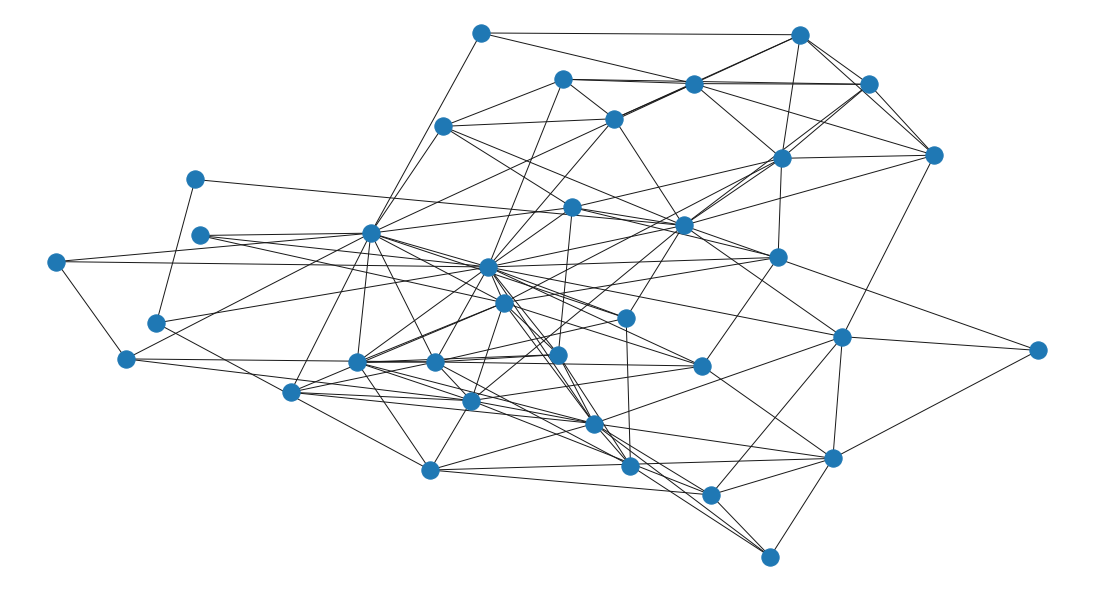

In [219]:
nx.draw_spring(G)

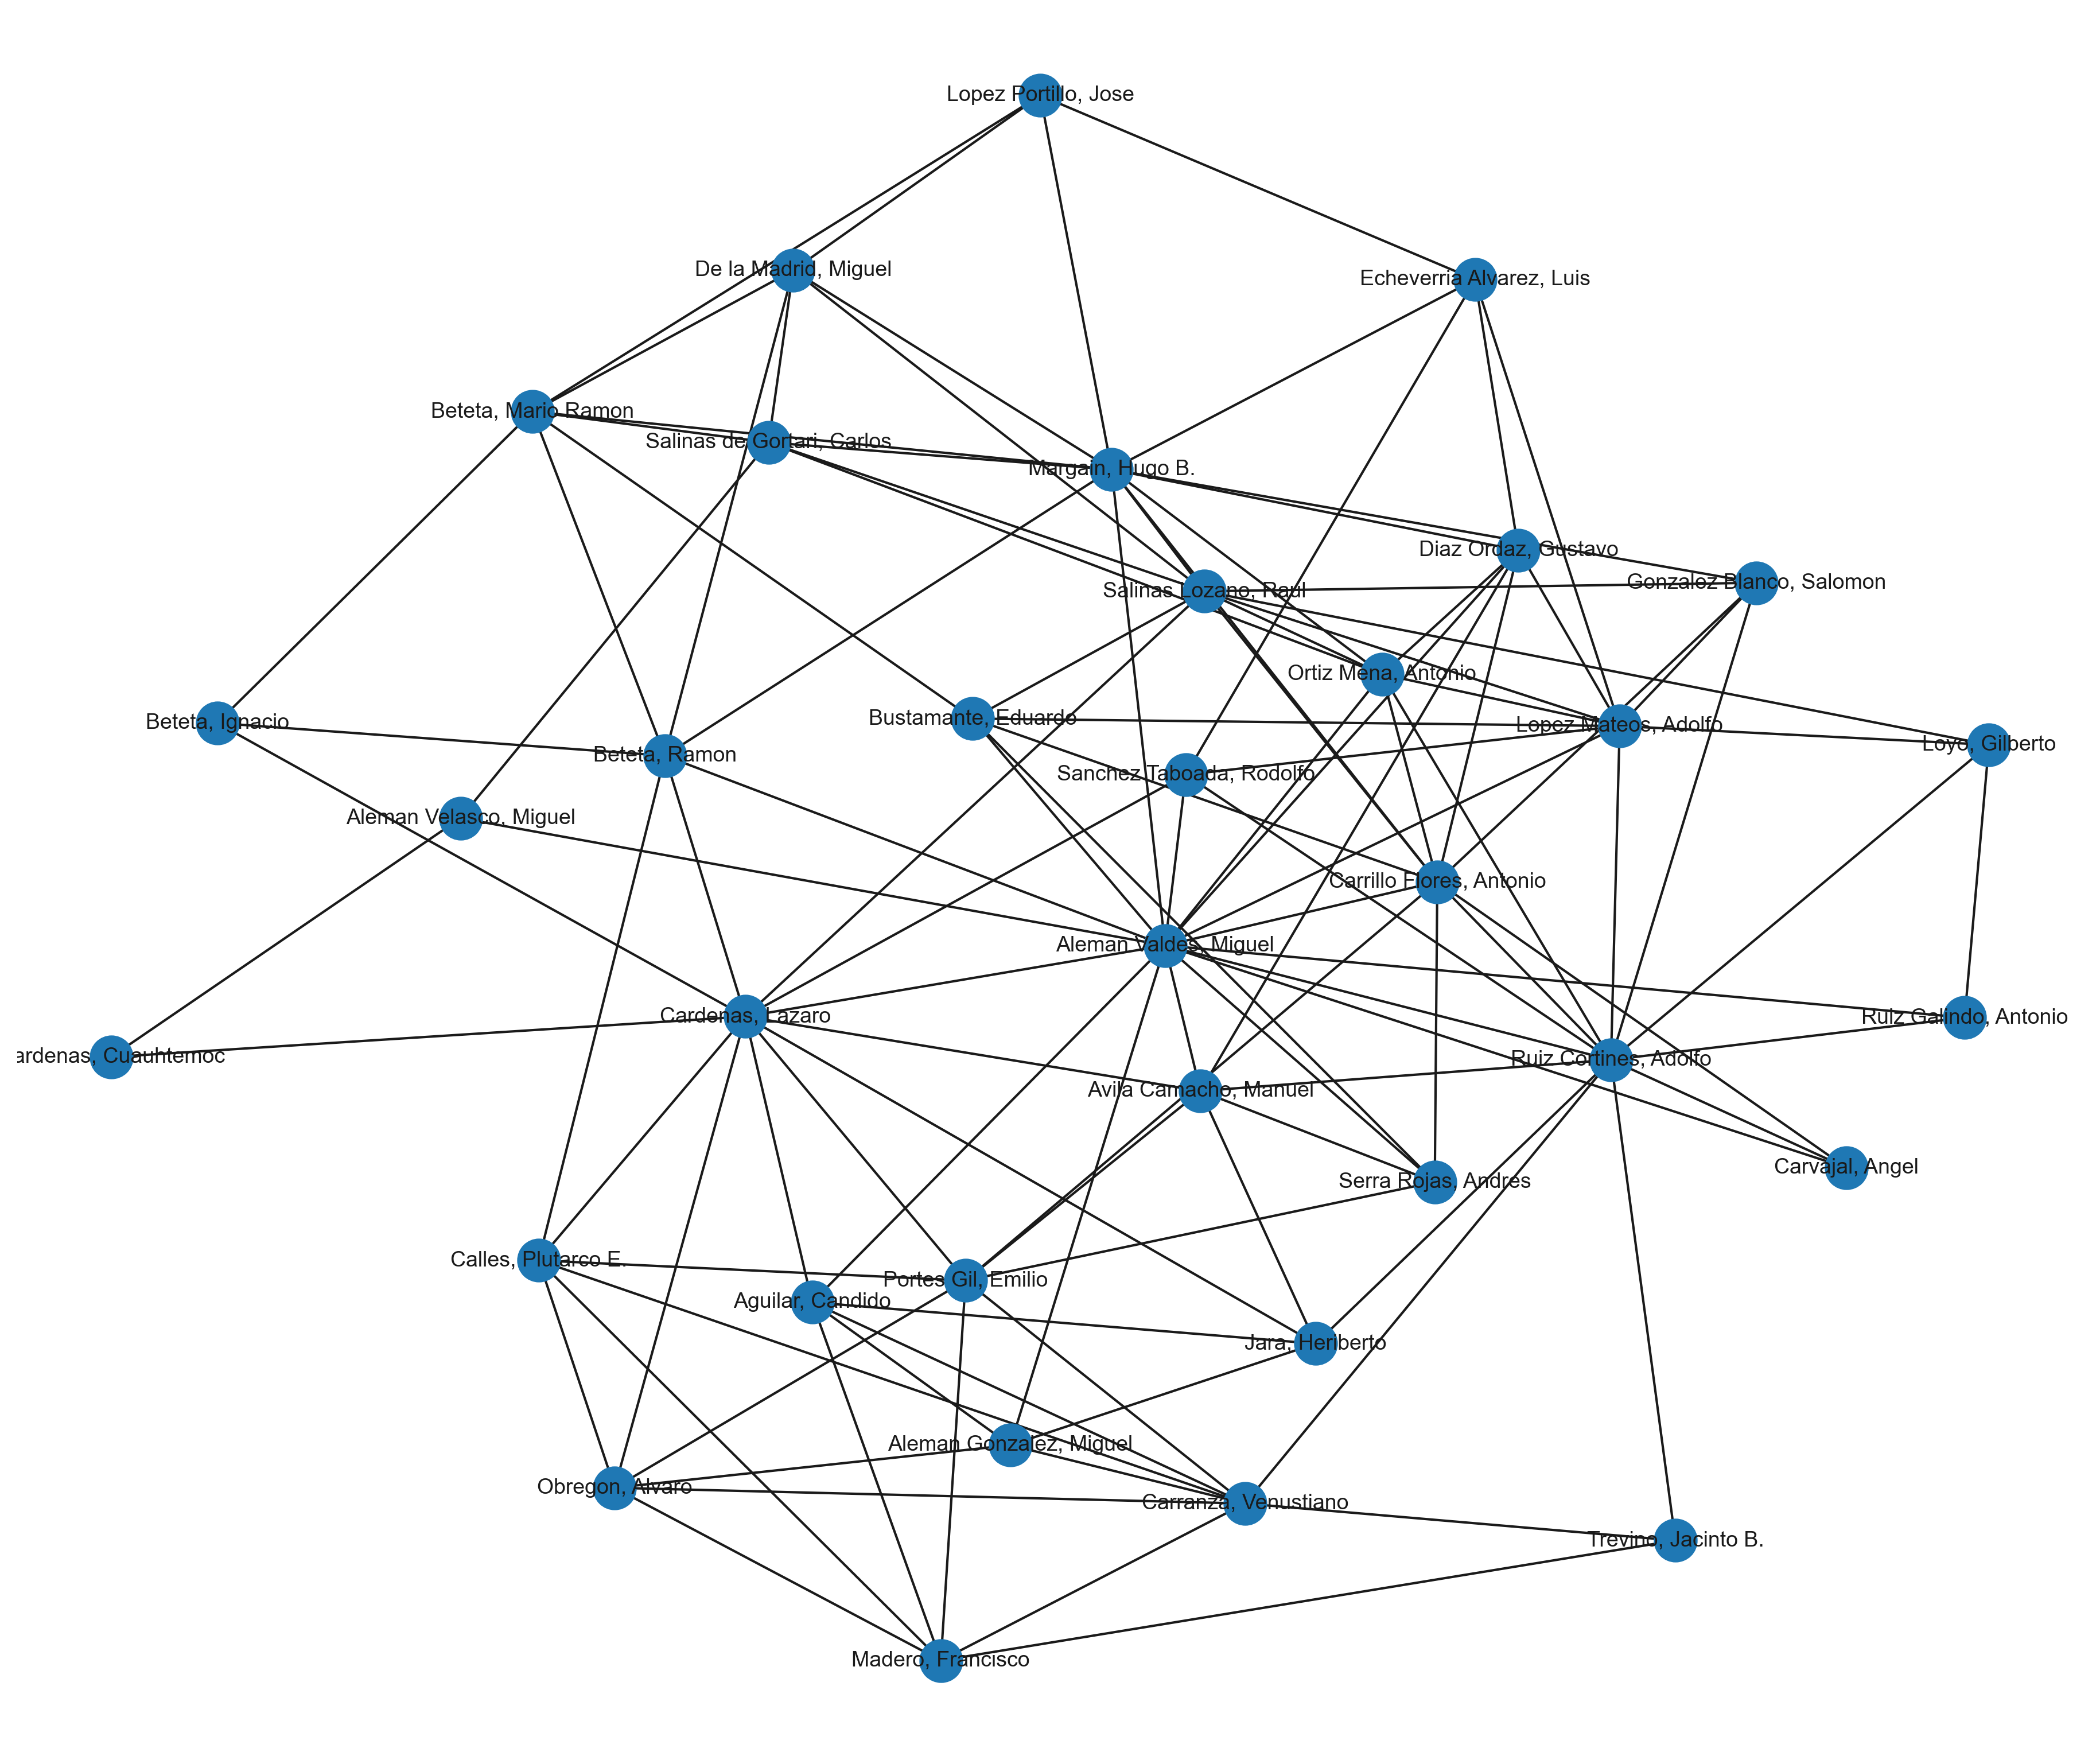

In [220]:
fig = plt.figure(1, figsize=(12, 10), dpi=300)
pos = dict(zip(nodes, [(float(c[0]), float(c[1])) for c in coor]))
# l = [n_attributes[n]['nombre'] for n in G.nodes()]
l = dict(zip(nodes, [n_attributes[n]['nombre'] for n in nodes]))

nx.draw(G, pos, labels = l, font_size = 9)
# plt.savefig('red1.png')

In [221]:
plot = Plot(width=1000, height=600,
            x_range=Range1d(0,1), y_range=Range1d(0,1))
plot.title.text = "Graph Interaction Demonstration"

plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool(), WheelZoomTool())

graph_renderer = from_networkx(G, pos, labels = l, font_size = 2)

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

# x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = [n_attributes[n]['nombre'] for n in nodes]
x = [float(c[0]) for c in coor]
y = [float(c[1]) for c in coor]
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='12px', background_fill_alpha=.7)
plot.renderers.append(labels)
# output_file("interactive_graphs.html")
output_notebook()
# plot.renderers.append(graph_renderer)

# show(plot)
show(plot)

Loading BokehJS ...

In [222]:
import PIL
icons = {
    "presidente_militar": "icons/presidente_m2.png",
    "presidente_civil": "icons/presidente_a2.png",
    "asociado_militar": "icons/asociado2.png",
    "asociado_civil": "icons/asociado1.png",
}

# Load images
images = {k: PIL.Image.open(fname) for k, fname in icons.items()}

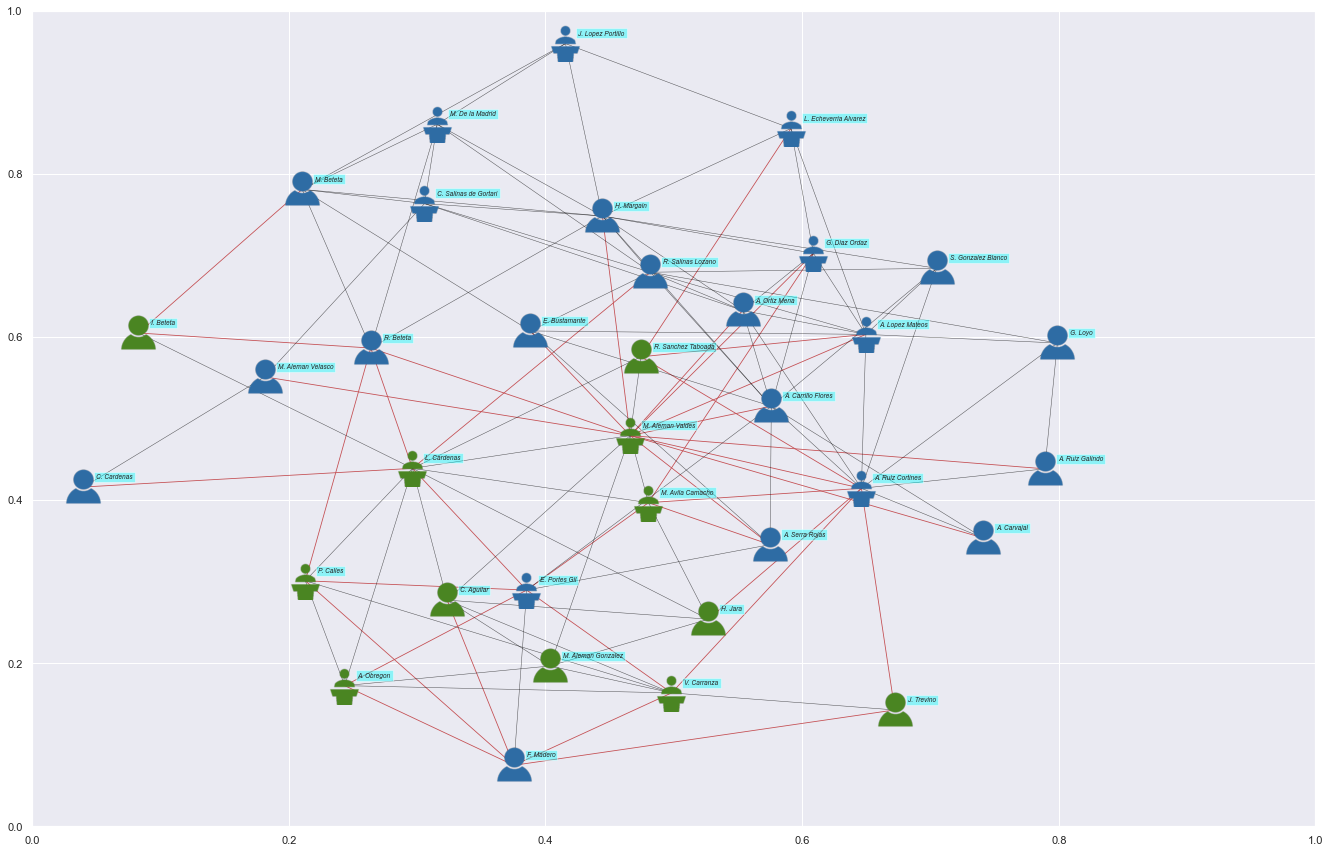

In [418]:
G = nx.Graph()

presidente = [False,True,True,True,False,False,True,False,False,True,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,True,False,False,True,False,False,True,True,False,False]
for n in nodes:
#     print(n)
    if n_attributes[n]['trasfondo'] == 'militar' and presidente[n-1]:      
        G.add_node(n, image=images['presidente_militar'])
    elif n_attributes[n]['trasfondo'] == 'civil' and presidente[n-1]:
        G.add_node(n, image=images['presidente_civil'])
    elif n_attributes[n]['trasfondo'] == 'civil' and not presidente[n-1]:
        G.add_node(n, image=images['asociado_civil'])
    else:
        G.add_node(n, image=images['asociado_militar'])
        

for edge in edges:
    G.add_edge(edge[0], edge[1])

# Get a reproducible layout and create figure
pos = pos
fig, ax = plt.subplots(figsize=(23, 15))
# fig, ax = plt.figure(1, figsize=(12, 10), dpi=300)

# Note: the min_source/target_margin kwargs only work with FancyArrowPatch objects.
# Force the use of FancyArrowPatch for edge drawing by setting `arrows=True`,
# but suppress arrowheads with `arrowstyle="-"`
mix, same = [], []
color_edge = []
for edge in edges:
#     print(n_attributes[edge[0]]['trasfondo'], n_attributes[edge[1]]['trasfondo'])
    if n_attributes[edge[0]]['trasfondo'] == 'militar' and n_attributes[edge[1]]['trasfondo'] == 'civil':
        color_edge.append('red')
        mix.append(edge)
    elif n_attributes[edge[1]]['trasfondo'] == 'militar' and n_attributes[edge[0]]['trasfondo'] == 'civil':
        color_edge.append('red')
        mix.append(edge)
    else:
        color_edge.append('black')
        same.append(edge)

# nx.draw_networkx_edges(
#     G,
#     pos=pos,
#     edge_color = color_edge,
#     ax=ax,
#     arrows=True,
#     alpha = 0.8,
#     arrowstyle="-",
#     min_source_margin=15,
#     min_target_margin=15,
# )

nx.draw_networkx_edges(G, pos, edgelist = mix, edge_color = 'r', ax=ax, min_source_margin=20, min_target_margin=20, width = 0.8)
nx.draw_networkx_edges(G, pos, edgelist = same, edge_color = 'black', alpha = 0.65, ax=ax, min_source_margin=20, min_target_margin=20, width = 0.5)

# Transform from data coordinates (scaled between xlim and ylim) to display coordinates
tr_figure = ax.transData.transform
# Transform from display to figure coordinates
tr_axes = fig.transFigure.inverted().transform

# Select the size of the image (relative to the X axis)
icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.035
icon_center = icon_size / 2.0

nombre_ab = []
for n in G.nodes:
    a, names = n_attributes[n]['nombre'].split(',')
    nombre_ab.append(names[1]+'. '+a)

for n in G.nodes:
    xf, yf = tr_figure(pos[n])
    xa, ya = tr_axes((xf, yf))
#     ax.text(3, 8, 'boxed italics text in data coords', style='italic',
#         bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
    # get overlapped axes and plot icon
    ax.text(pos[n][0]+0.01, pos[n][1]+0.01, nombre_ab[n-1], style='italic', fontsize=6.5,
        bbox={'facecolor': 'cyan', 'alpha': 0.4, 'pad': 2})
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]["image"])
    a.axis("off")

# plt.show()
# plt.savefig('red_visual2.png', dpi = 300)
plt.show()

{1: Text(0.3754, 0.0748, 'Madero, Francisco'),
 2: Text(0.4983, 0.1636, 'Carranza, Venustiano'),
 3: Text(0.2436, 0.1725, 'Obregon, Alvaro'),
 4: Text(0.2129, 0.3011, 'Calles, Plutarco E.'),
 5: Text(0.3234, 0.2774, 'Aguilar, Candido'),
 6: Text(0.6722, 0.1427, 'Trevino, Jacinto B.'),
 7: Text(0.3854, 0.2897, 'Portes Gil, Emilio'),
 8: Text(0.4035, 0.1966, 'Aleman Gonzalez, Miguel'),
 9: Text(0.5269, 0.254, 'Jara, Heriberto'),
 10: Text(0.2964, 0.439, 'Cardenas, Lazaro'),
 11: Text(0.4803, 0.3969, 'Avila Camacho, Manuel'),
 12: Text(0.466, 0.4792, 'Aleman Valdes, Miguel'),
 13: Text(0.083, 0.605, 'Beteta, Ignacio'),
 14: Text(0.2639, 0.5865, 'Beteta, Ramon'),
 15: Text(0.2104, 0.7811, 'Beteta, Mario Ramon'),
 16: Text(0.4744, 0.5758, 'Sanchez Taboada, Rodolfo'),
 17: Text(0.7412, 0.3536, 'Carvajal, Angel'),
 18: Text(0.6462, 0.4145, 'Ruiz Cortines, Adolfo'),
 19: Text(0.6497, 0.6033, 'Lopez Mateos, Adolfo'),
 20: Text(0.4444, 0.7484, 'Margain, Hugo B.'),
 21: Text(0.7049, 0.6843, 'Gonz

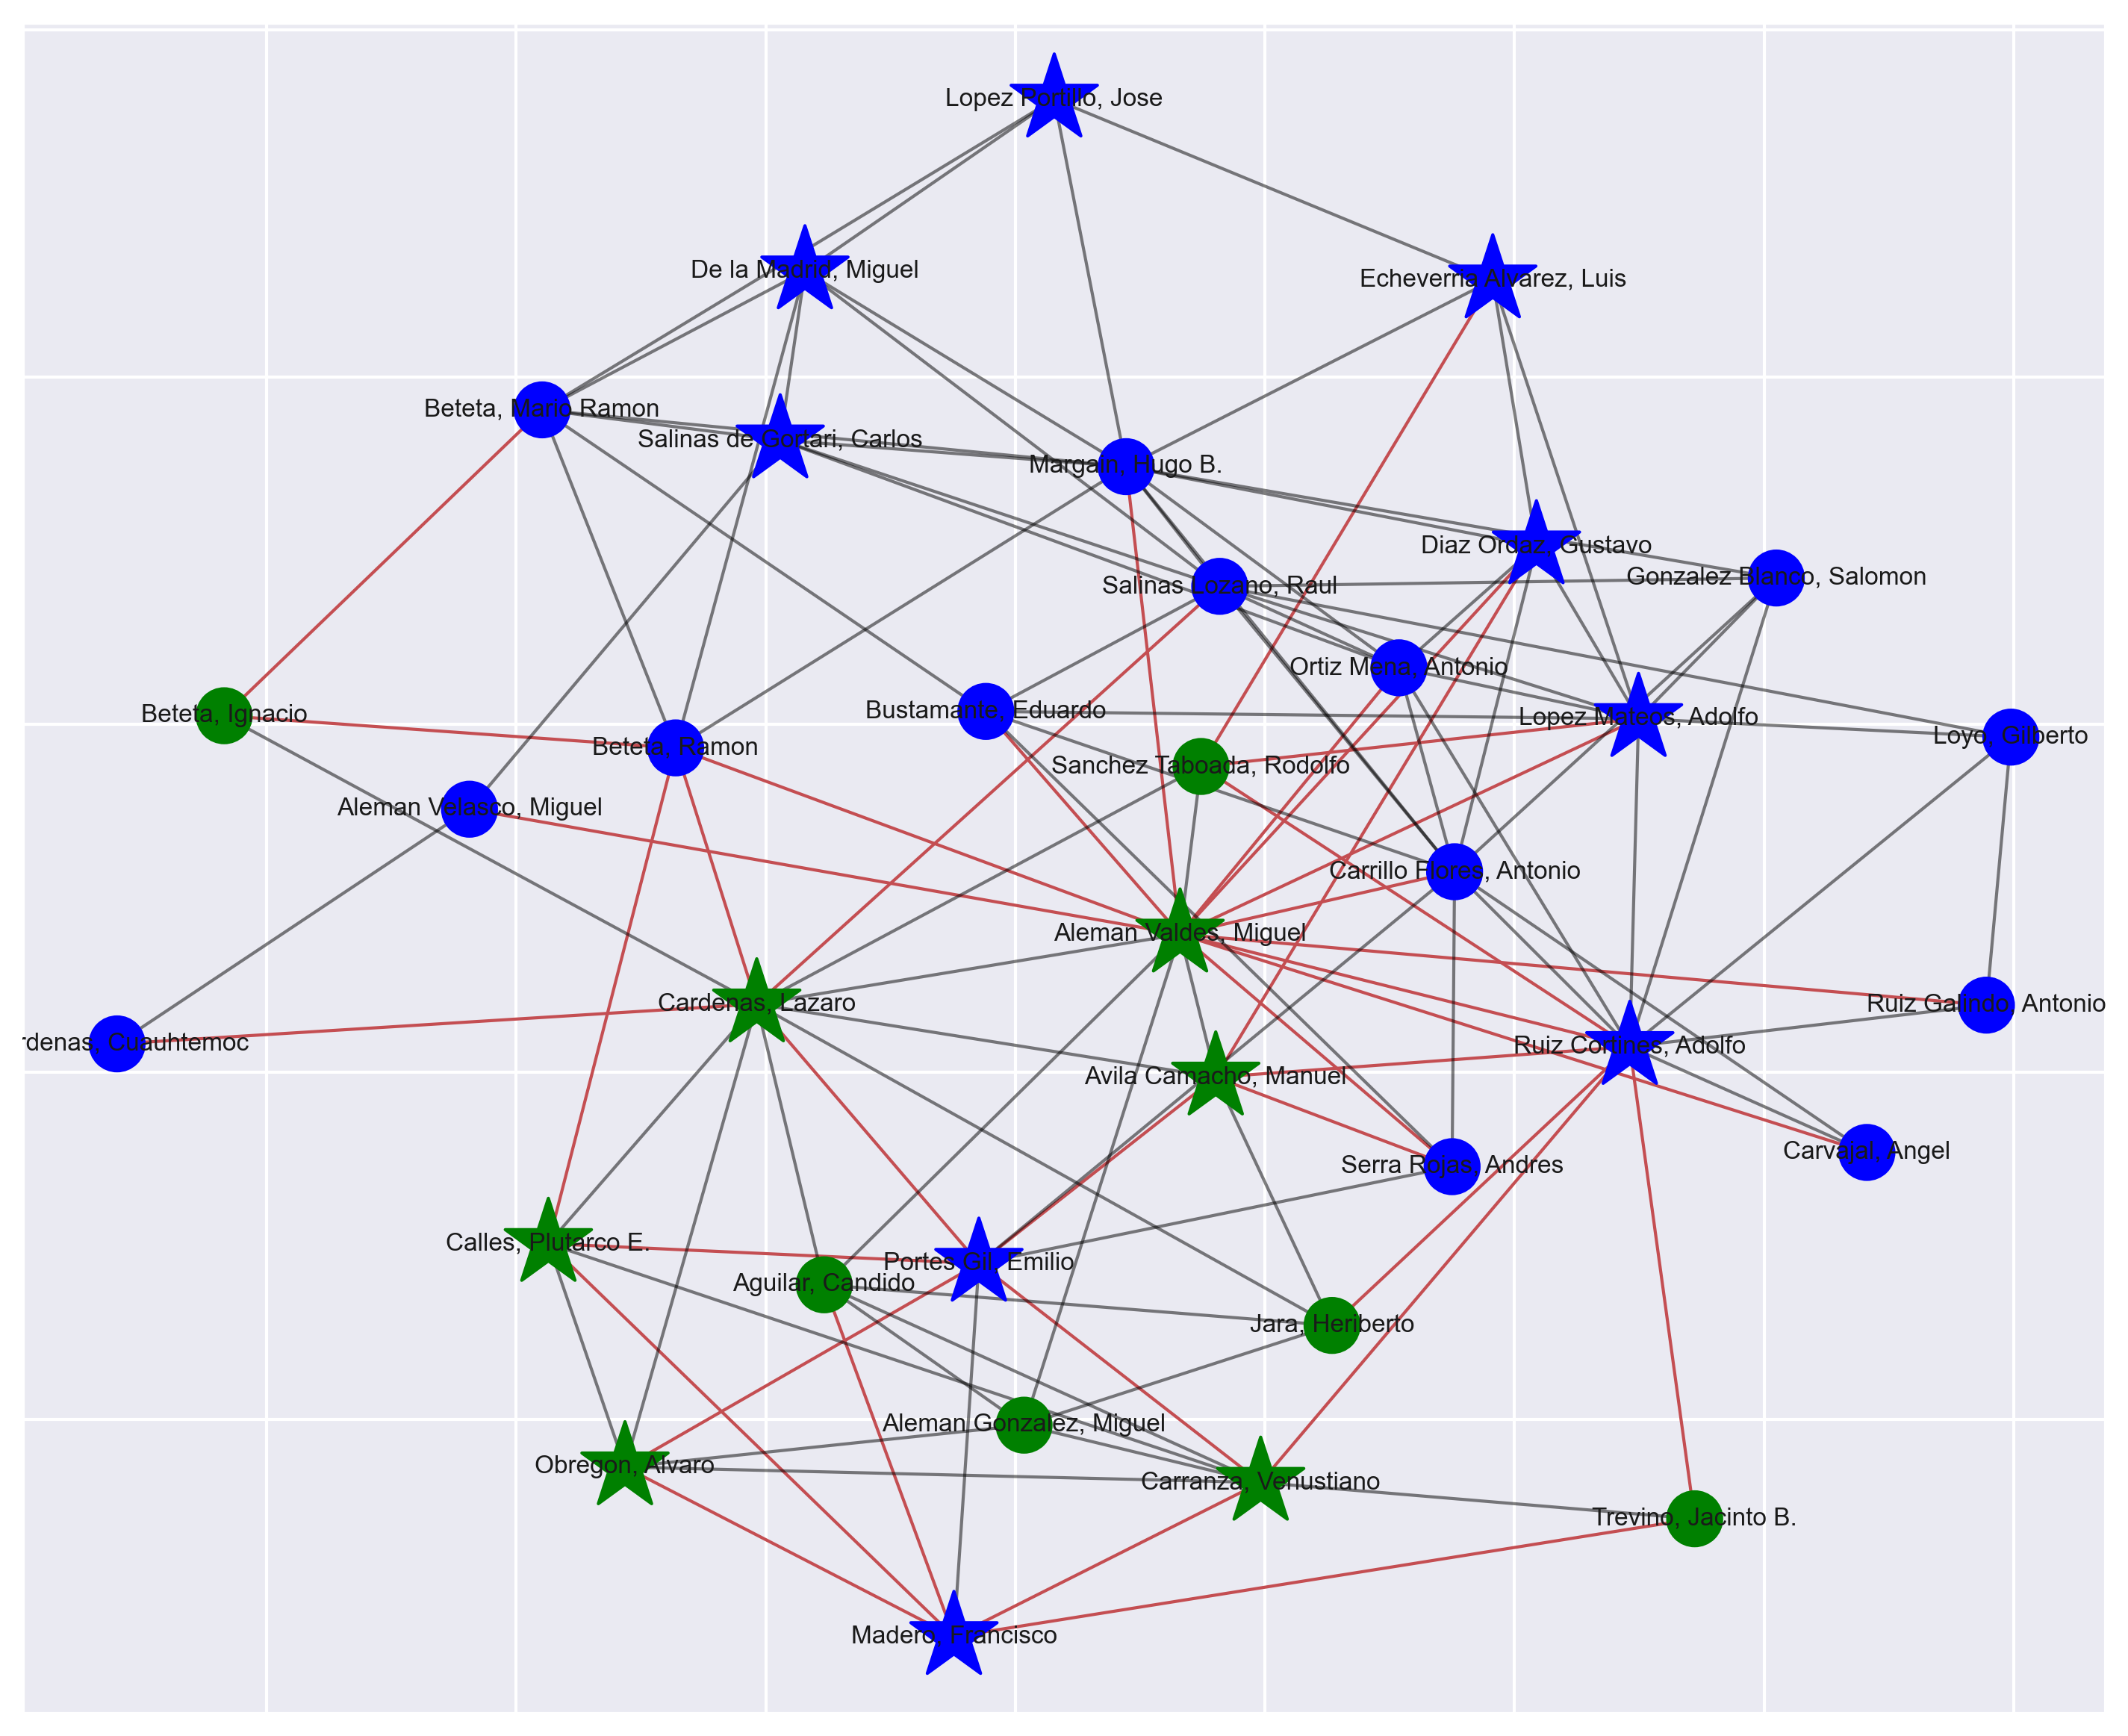

In [497]:
fig = plt.figure(1, figsize=(12, 10), dpi=300)
pos = dict(zip(nodes, [(float(c[0]), float(c[1])) for c in coor]))
# l = [n_attributes[n]['nombre'] for n in G.nodes()]
l = dict(zip(nodes, [n_attributes[n]['nombre'] for n in nodes]))

# G = nx.Graph()

presidentes = []
p_coor = {}
close_people = []
c_coor = {}

p = [True,True,True,True,False,False,True,False,False,True,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,True,False,False,True,False,False,True,True,False,False]
for n in zip(coor, nodes, p):
    if n[2] == True:
        presidentes.append(n[1])
        p_coor[n[1]] = (float(n[0][0]), float(n[0][1]))
    else:
        close_people.append(n[1])
        c_coor[n[1]] = (float(n[0][0]), float(n[0][1]))

mix = []
same = []
color_edge = []
for edge in edges:
#     print(n_attributes[edge[0]]['trasfondo'], n_attributes[edge[1]]['trasfondo'])
    if n_attributes[edge[0]]['trasfondo'] == 'militar' and n_attributes[edge[1]]['trasfondo'] == 'civil':
        color_edge.append('red')
        mix.append(edge)
    elif n_attributes[edge[1]]['trasfondo'] == 'militar' and n_attributes[edge[0]]['trasfondo'] == 'civil':
        color_edge.append('red')
        mix.append(edge)
    else:
        color_edge.append('black')
        same.append(edge)

# p_coor
# nx.draw_spring(G)
# print(len(close_people), len(c_coor))
# p = nx.spring_layout(G, presidentes)
nx.draw_networkx_nodes(G,p_coor, presidentes, node_color=['green' if x[1] == 'militar' else 'blue' for x in zip(presidentes, [n_attributes[n]['trasfondo'] for n in presidentes])], node_shape="*", node_size = 850)
nx.draw_networkx_nodes(G,c_coor, nodelist = close_people, node_color=['green' if x[1] == 'militar' else 'blue' for x in zip(close_people, [n_attributes[n]['trasfondo'] for n in close_people])])
nx.draw_networkx_edges(G, pos, edgelist = mix, edge_color = 'r')
nx.draw_networkx_edges(G, pos, edgelist = same, edge_color = 'black', alpha = 0.5)
nx.draw_networkx_labels(G, pos, font_size = 8, labels = l)
# nx.draw(G, pos, labels = l, font_size = 9, node_color = ['green' if x[1] == 'militar' else 'blue' for x in zip(nodes, [n_attributes[n]['trasfondo'] for n in nodes])], edge_color = color_edge)
# nx.draw(G, pos, with_labels = True, font_size = 9, node_color = ['green' if x[1] == 'militar' else 'blue' for x in zip(nodes, [n_attributes[n]['trasfondo'] for n in nodes])], edgelist = militar)
# plt.savefig('red2.png')

In [225]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35))

In [226]:
p_coor

{2: (0.4983, 0.1636),
 3: (0.2436, 0.1725),
 4: (0.2129, 0.3011),
 7: (0.3854, 0.2897),
 10: (0.2964, 0.439),
 11: (0.4803, 0.3969),
 12: (0.466, 0.4792),
 18: (0.6462, 0.4145),
 19: (0.6497, 0.6033),
 25: (0.6088, 0.7027),
 26: (0.5913, 0.8558),
 29: (0.4156, 0.9599),
 32: (0.3157, 0.861),
 33: (0.3058, 0.7637)}

In [227]:
n_attributes

{1: {'nombre': 'Madero, Francisco', 'año': 1911, 'trasfondo': 'civil'},
 2: {'nombre': 'Carranza, Venustiano', 'año': 1913, 'trasfondo': 'militar'},
 3: {'nombre': 'Obregon, Alvaro', 'año': 1920, 'trasfondo': 'militar'},
 4: {'nombre': 'Calles, Plutarco E.', 'año': 1924, 'trasfondo': 'militar'},
 5: {'nombre': 'Aguilar, Candido', 'año': 1918, 'trasfondo': 'militar'},
 6: {'nombre': 'Trevino, Jacinto B.', 'año': 1910, 'trasfondo': 'militar'},
 7: {'nombre': 'Portes Gil, Emilio', 'año': 1928, 'trasfondo': 'civil'},
 8: {'nombre': 'Aleman Gonzalez, Miguel', 'año': 1927, 'trasfondo': 'militar'},
 9: {'nombre': 'Jara, Heriberto', 'año': 1941, 'trasfondo': 'militar'},
 10: {'nombre': 'Cardenas, Lazaro', 'año': 1934, 'trasfondo': 'militar'},
 11: {'nombre': 'Avila Camacho, Manuel', 'año': 1940, 'trasfondo': 'militar'},
 12: {'nombre': 'Aleman Valdes, Miguel', 'año': 1946, 'trasfondo': 'militar'},
 13: {'nombre': 'Beteta, Ignacio', 'año': 1940, 'trasfondo': 'militar'},
 14: {'nombre': 'Beteta,

In [228]:
G.edges(1)


EdgeDataView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7)])

In [229]:
conexiones_militares = []
conexiones_civiles = []
for n in G.nodes():
    c_militares, c_civiles = 0, 0
    for r in G.edges(n):
        if n_attributes[r[1]]['trasfondo'] == 'militar':
            c_militares += 1
        else:
            c_civiles += 1
    conexiones_militares.append(c_militares)
    conexiones_civiles.append(c_civiles)

In [230]:
grados = pd.DataFrame({'Nombre': [n_attributes[i]['nombre'] for i in G.nodes()],
                   'Militares': conexiones_militares,
                   'Civiles': conexiones_civiles})

<AxesSubplot:xlabel='Nombre'>

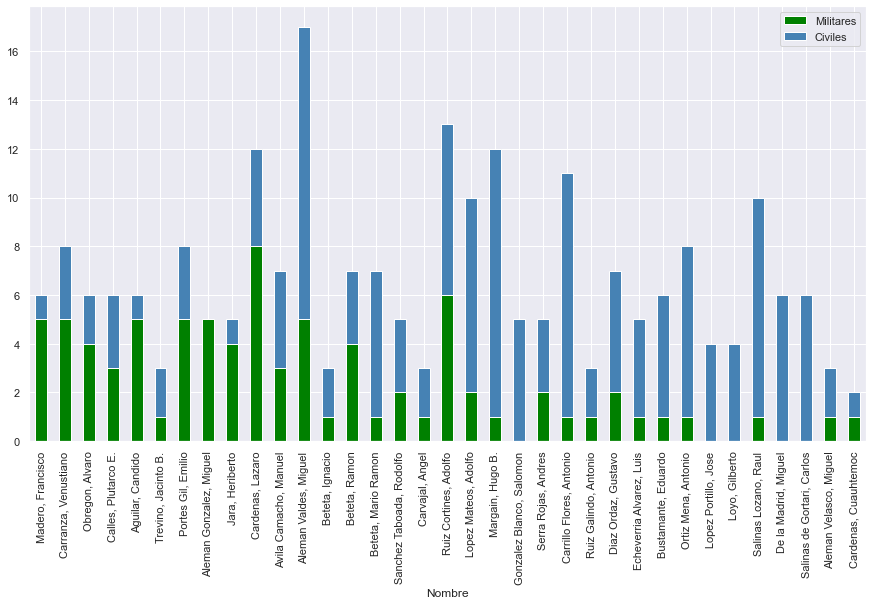

In [291]:
sns.set(style='white')
sns.set(rc = {'figure.figsize':(15,8)})
grados.set_index('Nombre').plot(kind='bar', stacked=True, color=['green', 'steelblue'])

In [290]:
#Considerar el tiempo que tuvieron para hacer relaciones
eig_c = nx.eigenvector_centrality(G)
eig_c = {k: v for k, v in sorted(eig_c.items(), key=lambda item: item[1], reverse = True)}
for key in eig_c:
    print(n_attributes[key]['año'], n_attributes[key]['nombre'], '\t', eig_c[key])

1946 Aleman Valdes, Miguel 	 0.3711422848947064
1952 Carrillo Flores, Antonio 	 0.2870124461632528
1952 Ruiz Cortines, Adolfo 	 0.273207950005782
1965 Margain, Hugo B. 	 0.2731992344279984
1958 Lopez Mateos, Adolfo 	 0.24990032874003065
1952 Ortiz Mena, Antonio 	 0.24839047778535195
1956 Salinas Lozano, Raul 	 0.2394462942212732
1934 Cardenas, Lazaro 	 0.21373407612047732
1965 Diaz Ordaz, Gustavo 	 0.2106428673817293
1940 Avila Camacho, Manuel 	 0.17881286936475851
1946 Bustamante, Eduardo 	 0.17199820558023995
1953 Gonzalez Blanco, Salomon 	 0.16146017501414214
1945 Beteta, Ramon 	 0.15345486564081715
1946 Sanchez Taboada, Rodolfo 	 0.1495542300710237
1928 Portes Gil, Emilio 	 0.14707057385477948
1946 Serra Rojas, Andres 	 0.14110936316201894
1988 Salinas de Gortari, Carlos 	 0.13039293072717165
1982 De la Madrid, Miguel 	 0.1213490355254889
1970 Beteta, Mario Ramon 	 0.1204874470160498
1918 Aguilar, Candido 	 0.12039120369362138
1913 Carranza, Venustiano 	 0.11756612088911836
1970 Ec

In [453]:
local_bridges = list(nx.local_bridges(G))
for l in local_bridges:
    print(l)
    print([n_attributes[p]['nombre'] for p in l])

(10, 31, 3)
['Cardenas, Lazaro', 'Salinas Lozano, Raul', 'Obregon, Alvaro']
(10, 35, 3)
['Cardenas, Lazaro', 'Cardenas, Cuauhtemoc', 'Obregon, Alvaro']
(12, 34, 3)
['Aleman Valdes, Miguel', 'Aleman Velasco, Miguel', 'Obregon, Alvaro']
(15, 27, 3)
['Beteta, Mario Ramon', 'Bustamante, Eduardo', 'Obregon, Alvaro']
(33, 34, 3)
['Salinas de Gortari, Carlos', 'Aleman Velasco, Miguel', 'Obregon, Alvaro']
(34, 35, 3)
['Aleman Velasco, Miguel', 'Cardenas, Cuauhtemoc', 'Obregon, Alvaro']


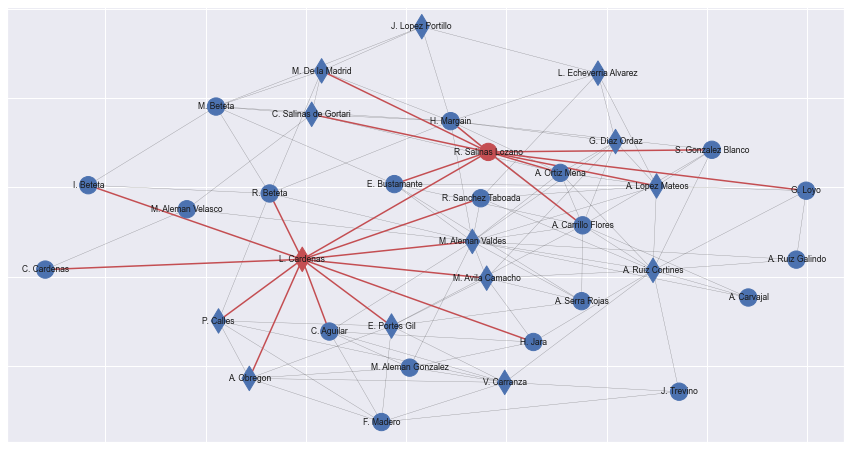

In [491]:
# nx.draw_networkx(G, pos = pos, node_color = ['r' if n in local_bridges[0] else 'b' for n in G.nodes], labels = {x: nombre_ab[x-1] for x in range(1, len(G.nodes)+1)}, edge_color = 'grey', width = 0.5, font_size = 8)
x = 0
local_bridges[x] = [local_bridges[x][0], local_bridges[x][1]]
# nx.draw_networkx_nodes(G, pos = pos, node_color = ['r' if n in local_bridges[x] else 'b' for n in G.nodes])
nx.draw_networkx_nodes(G,p_coor, presidentes, node_color=['r' if n in local_bridges[x] else 'b' for n in presidentes], node_shape="d")
nx.draw_networkx_nodes(G,c_coor, nodelist = close_people, node_color=['r' if n in local_bridges[x] else 'b' for n in close_people])


not_important = []
important = []
for e in edges:
    if e[0] in local_bridges[x] or e[1] in local_bridges[x]:
        important.append(e)
    else:
        not_important.append(e)
    
nx.draw_networkx_edges(G, pos, edgelist = not_important, edge_color = 'k', alpha = 0.5, width = 0.3)
nx.draw_networkx_edges(G, pos, edgelist = important, edge_color = 'r', alpha = 1, width = 1.5)
labels = nx.draw_networkx_labels(G, pos, font_size = 8.5, labels = {x: nombre_ab[x-1] for x in range(1, len(G.nodes)+1)})

posible link que hizo que Carlos Salinas llegara a la presidencia

In [317]:
actores_importantes = nx.voterank(G, 3)
print([n_attributes[n]['nombre'] for n in actores_importantes])

['Aleman Valdes, Miguel', 'Ruiz Cortines, Adolfo', 'Cardenas, Lazaro']


In [319]:
voronoi = nx.voronoi_cells(G, center_nodes = actores_importantes) 

In [323]:
print(voronoi)

{12: {1, 5, 8, 11, 12, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 32, 33, 34}, 18: {2, 6, 9, 18, 21, 30}, 10: {3, 4, 35, 7, 10, 13, 31}}


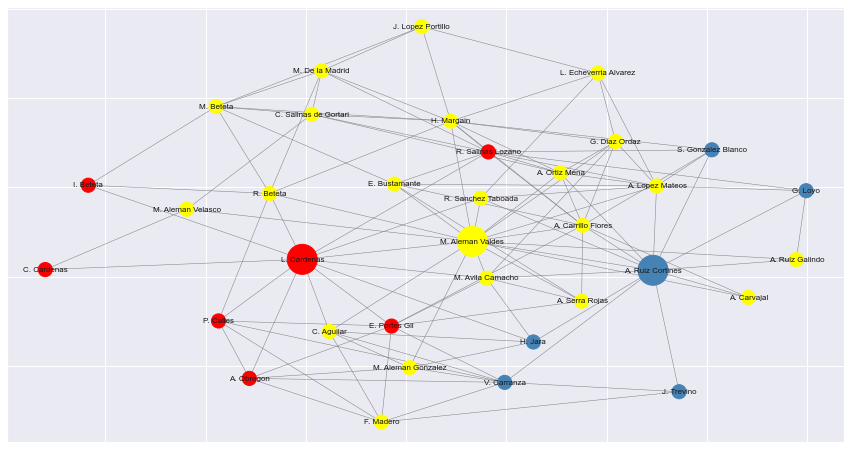

In [521]:
voronoi_colors = []
for node in G.nodes:
    if node in voronoi[actores_importantes[0]] or node == actores_importantes[0]:
#         if node == actores_importantes[0]:
#             voronoi_colors.append('#1c6373')
#         else:
#             voronoi_colors.append('#009c8f')
        voronoi_colors.append('yellow')
    elif node in voronoi[actores_importantes[1]] or node == actores_importantes[1]:
#         if node == actores_importantes[1]:
#             voronoi_colors.append('#ce0202')
#         else:
#             voronoi_colors.append('#e35300')
        voronoi_colors.append('steelblue')
    elif node in voronoi[actores_importantes[2]] or node == actores_importantes[2]:
#         if node == actores_importantes[2]:
#             voronoi_colors.append('#08850a')
#         else:
#             voronoi_colors.append('#84b700')
        voronoi_colors.append('red')
        
nx.draw_networkx(G, pos = pos, node_color = voronoi_colors, labels = {x: nombre_ab[x-1] for x in range(1, len(G.nodes)+1)}, edge_color = 'grey', width = 0.5, font_size = 8, node_size = [900 if n in actores_importantes else 200 for n in G.nodes])

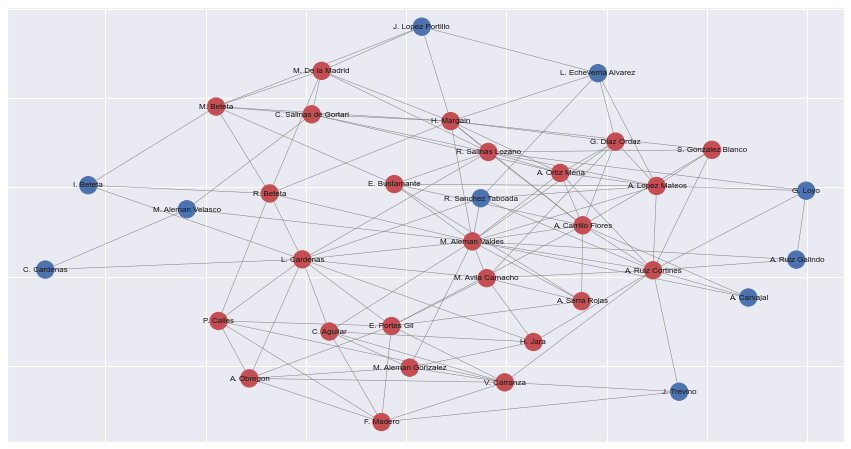

In [423]:
core = nx.k_core(G)
color_p = ['r' if n in core else 'b' for n in G.nodes]
nx.draw_networkx(G, pos = pos, node_color = color_p, labels = {x: nombre_ab[x-1] for x in range(1, len(G.nodes)+1)}, edge_color = 'grey', width = 0.5, font_size = 8)

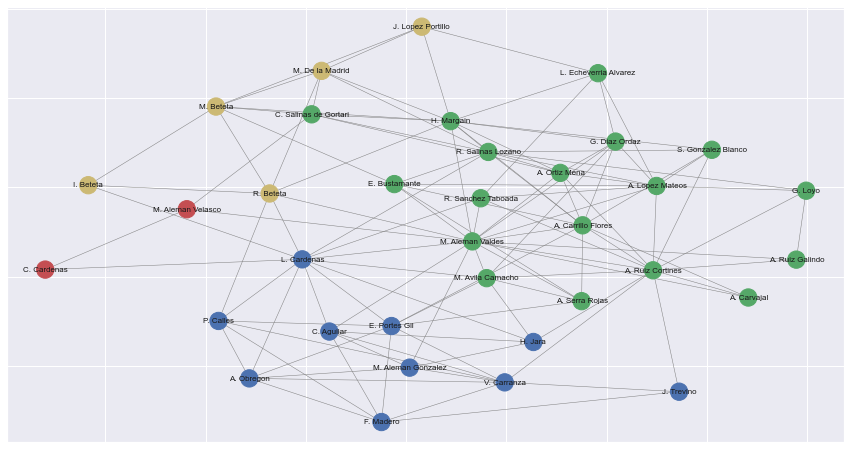

In [479]:
communities = list(nx.algorithms.community.centrality.girvan_newman(G))
no_communities = 4
for c in communities:
    if len(c) == no_communities:
        com = c
        break
colors = ['b', 'g', 'y', 'r', 'c', 'm', 'k', 'orange', 'pink', 'white']
color_p = []
for n in G.nodes:
    for i in range(len(com)):
        if n in com[i]:
            color_p.append(colors[i])
            
# nx.draw_networkx_edges(G, edges, edge_color = 'red')
nx.draw_networkx(G, pos = pos, node_color = color_p, labels = {x: nombre_ab[x-1] for x in range(1, len(G.nodes)+1)}, edge_color = 'grey', width = 0.5, font_size = 8)
# nx.draw_networkx_edges(G, edges, edge_color = 'red')
# edges

1 Cardenas, Cuauhtemoc
2 Aleman Velasco, Miguel
3 Trevino, Jacinto B.
3 Beteta, Ignacio
3 Carvajal, Angel
3 Ruiz Galindo, Antonio
4 Loyo, Gilberto
5 Lopez Portillo, Jose
6 Echeverria Alvarez, Luis
7 Sanchez Taboada, Rodolfo
8 Madero, Francisco
8 Aleman Gonzalez, Miguel
8 Jara, Heriberto
8 Beteta, Mario Ramon
8 Gonzalez Blanco, Salomon
8 Serra Rojas, Andres
8 De la Madrid, Miguel
8 Salinas de Gortari, Carlos
9 Aguilar, Candido
9 Obregon, Alvaro
9 Beteta, Ramon
9 Bustamante, Eduardo
9 Carranza, Venustiano
9 Calles, Plutarco E.
9 Avila Camacho, Manuel
10 Portes Gil, Emilio
10 Cardenas, Lazaro
10 Ruiz Cortines, Adolfo
10 Lopez Mateos, Adolfo
10 Margain, Hugo B.
10 Diaz Ordaz, Gustavo
10 Salinas Lozano, Raul
11 Aleman Valdes, Miguel
11 Carrillo Flores, Antonio
11 Ortiz Mena, Antonio


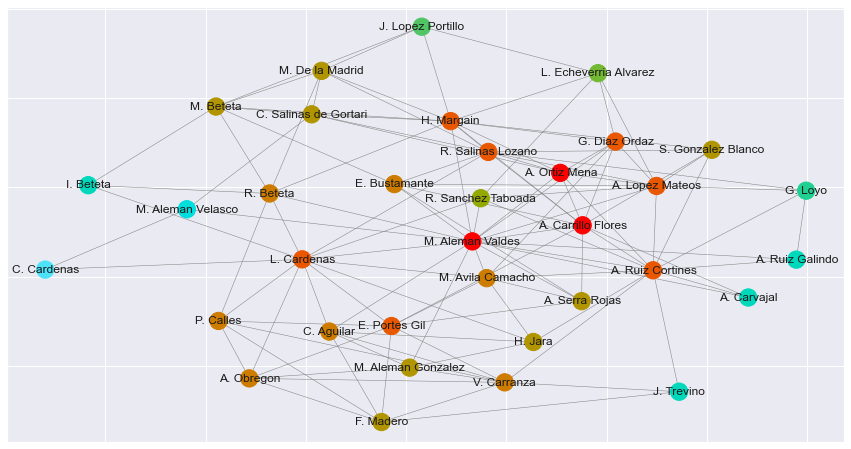

In [485]:
onion_layers = nx.algorithms.core.onion_layers(G)
for key in onion_layers:
    print (onion_layers[key], n_attributes[key]['nombre'])
onion_layers = dict(sorted(onion_layers.items()))
# print(onion_layers)
# for key in onion_layers:
#     print (onion_layers[key], n_attributes[key]['nombre'])
#     if onion_layers[key] == 11:
#         print(n_attributes[key]['nombre'])
        
colors = ['#4ce3f8', '#00dede', '#00d8bc', '#20d093', '#51c566', '#74b933', '#93a900', '#b19500', '#ce7c00', '#e95800', '#ff0000']
color_p = []
for key in onion_layers:
#     print(colors[onion_layers[key]-1], n_attributes[onion_layers[key]-1])
    color_p.append(colors[onion_layers[key]-1])
nx.draw_networkx(G, pos = pos, node_color = color_p, labels = {x: nombre_ab[x-1] for x in range(1, len(G.nodes)+1)}, edge_color = 'grey', width = 0.5)

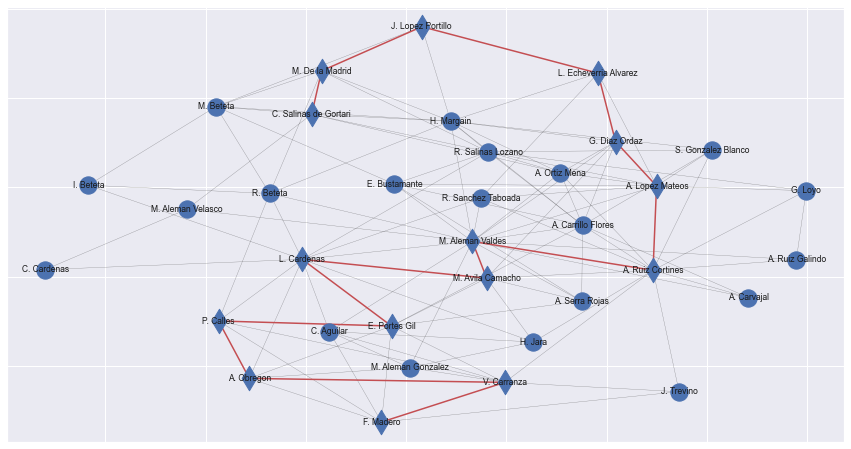

In [499]:
not_important = []
important = []
done = []
for e in edges:
    if e[0] in presidentes and e[1] in presidentes and e[0] not in done:
        important.append(e)
        done.append(e[0])
    else:
        not_important.append(e)

# print(important)
        
nx.draw_networkx_nodes(G,p_coor, presidentes, node_color='b', node_shape="d")
nx.draw_networkx_nodes(G,c_coor, nodelist = close_people, node_color='b')
nx.draw_networkx_edges(G, pos, edgelist = not_important, edge_color = 'k', alpha = 0.5, width = 0.3)
nx.draw_networkx_edges(G, pos, edgelist = important, edge_color = 'r', alpha = 1, width = 1.5)
labels = nx.draw_networkx_labels(G, pos, font_size = 8.5, labels = {x: nombre_ab[x-1] for x in range(1, len(G.nodes)+1)})

In [232]:
main_core = nx.k_core(G)
main_core.nodes()

NodeView((1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 18, 19, 20, 21, 22, 23, 25, 27, 28, 31, 32, 33))

In [233]:
nx.algorithms.core.onion_layers(G)

{35: 1,
 34: 2,
 6: 3,
 13: 3,
 17: 3,
 24: 3,
 30: 4,
 29: 5,
 26: 6,
 16: 7,
 1: 8,
 8: 8,
 9: 8,
 15: 8,
 21: 8,
 22: 8,
 32: 8,
 33: 8,
 5: 9,
 3: 9,
 14: 9,
 27: 9,
 2: 9,
 4: 9,
 11: 9,
 7: 10,
 10: 10,
 18: 10,
 19: 10,
 20: 10,
 25: 10,
 31: 10,
 12: 11,
 23: 11,
 28: 11}

In [234]:
nx.betweenness_centrality(G, normalized = False)

{1: 4.592191142191143,
 2: 17.358262570762573,
 3: 4.520314407814408,
 4: 13.963136863136864,
 5: 11.563458252274039,
 6: 2.834523809523809,
 7: 21.799420024420023,
 8: 5.293876445192235,
 9: 3.814224664224664,
 10: 88.07807477610109,
 11: 11.446794725742095,
 12: 129.12505710663606,
 13: 2.639078465394255,
 14: 32.65216851861589,
 15: 12.86341334104492,
 16: 11.12815693078851,
 17: 0.0,
 18: 73.8404800608748,
 19: 19.82546013927593,
 20: 50.257792134765815,
 21: 2.594915683731473,
 22: 3.1813492063492066,
 23: 33.568303407119195,
 24: 1.2416666666666667,
 25: 7.731291296422876,
 26: 6.1564970117601705,
 27: 9.605266955266954,
 28: 12.152466466282256,
 29: 1.5178571428571428,
 30: 2.677355977355978,
 31: 36.40862368625526,
 32: 4.802699055330635,
 33: 8.969852369852369,
 34: 8.012637362637363,
 35: 1.7833333333333334}

In [282]:
nx.voterank(G, 3)

[12, 18, 10]

In [236]:
nx.dispersion(G)

{1: {2: 1.4, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0},
 2: {1: 1.2, 3: 0.5, 4: 0.0, 5: 0.0, 6: 0.5, 7: 0.0, 8: 0.0, 18: 0.0},
 3: {1: 0.0, 2: 0.75, 4: 0.0, 7: 0.0, 8: 0.0, 10: 0.0},
 4: {1: 0.0, 2: 0.0, 3: 0.0, 7: 0.0, 10: 0.6666666666666666, 14: 0.0},
 5: {1: 0.0, 2: 0.5, 8: 0.6666666666666666, 9: 0.0, 10: 0.0, 12: 0.0},
 6: {1: 0.0, 2: 0.5, 18: 0.0},
 7: {1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  10: 0.6666666666666666,
  11: 0.5,
  22: 0.5,
  23: 0.0},
 8: {2: 0.5, 3: 0.0, 5: 1.0, 9: 0.0, 12: 0.0},
 9: {5: 0.5, 8: 0.0, 10: 0.5, 11: 0.5, 18: 0.0},
 10: {3: 0.0,
  4: 0.6666666666666666,
  5: 0.0,
  7: 0.6666666666666666,
  9: 0.0,
  11: 0.6666666666666666,
  12: 1.25,
  13: 0.0,
  14: 1.0,
  16: 0.0,
  31: 0.0,
  35: 0.0},
 11: {7: 0.0,
  9: 0.0,
  10: 0.3333333333333333,
  12: 1.0,
  18: 0.0,
  22: 0.0,
  25: 0.0},
 12: {5: 0.5,
  8: 0.0,
  10: 1.25,
  11: 0.5,
  14: 0.5,
  16: 0.3333333333333333,
  17: 0.0,
  18: 1.4285714285714286,
  19: 0.4,
  20: 0.75,
  22: 0.3333333333333333,
  23

In [237]:
nx.algorithms.centrality.dispersion(G)

{1: {2: 1.4, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0},
 2: {1: 1.2, 3: 0.5, 4: 0.0, 5: 0.0, 6: 0.5, 7: 0.0, 8: 0.0, 18: 0.0},
 3: {1: 0.0, 2: 0.75, 4: 0.0, 7: 0.0, 8: 0.0, 10: 0.0},
 4: {1: 0.0, 2: 0.0, 3: 0.0, 7: 0.0, 10: 0.6666666666666666, 14: 0.0},
 5: {1: 0.0, 2: 0.5, 8: 0.6666666666666666, 9: 0.0, 10: 0.0, 12: 0.0},
 6: {1: 0.0, 2: 0.5, 18: 0.0},
 7: {1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  10: 0.6666666666666666,
  11: 0.5,
  22: 0.5,
  23: 0.0},
 8: {2: 0.5, 3: 0.0, 5: 1.0, 9: 0.0, 12: 0.0},
 9: {5: 0.5, 8: 0.0, 10: 0.5, 11: 0.5, 18: 0.0},
 10: {3: 0.0,
  4: 0.6666666666666666,
  5: 0.0,
  7: 0.6666666666666666,
  9: 0.0,
  11: 0.6666666666666666,
  12: 1.25,
  13: 0.0,
  14: 1.0,
  16: 0.0,
  31: 0.0,
  35: 0.0},
 11: {7: 0.0,
  9: 0.0,
  10: 0.3333333333333333,
  12: 1.0,
  18: 0.0,
  22: 0.0,
  25: 0.0},
 12: {5: 0.5,
  8: 0.0,
  10: 1.25,
  11: 0.5,
  14: 0.5,
  16: 0.3333333333333333,
  17: 0.0,
  18: 1.4285714285714286,
  19: 0.4,
  20: 0.75,
  22: 0.3333333333333333,
  23

In [238]:
nx.subgraph_centrality(G)

{1: 43.72265634343649,
 2: 77.2374741379894,
 3: 54.06139347688442,
 4: 55.777320980820704,
 5: 66.89015863515323,
 6: 18.045146918577586,
 7: 100.03497157307763,
 8: 46.274148452049474,
 9: 51.07966189524092,
 10: 184.22103926210048,
 11: 123.29285733398783,
 12: 502.0593538537681,
 13: 17.885701434943773,
 14: 94.57854551121788,
 15: 67.51519528214682,
 16: 84.59231257935812,
 17: 49.68249612586616,
 18: 279.34500666943217,
 19: 234.75943482913627,
 20: 288.2523314776077,
 21: 99.35072193871977,
 22: 76.60854990415983,
 23: 303.29699769809076,
 24: 33.559039949207836,
 25: 165.7374382340342,
 26: 55.65111699324213,
 27: 111.14333445880384,
 28: 230.22501523046452,
 29: 30.35064836922887,
 30: 43.78496054657302,
 31: 217.11123809529752,
 32: 68.21460454044288,
 33: 73.28261139374594,
 34: 18.04455544987635,
 35: 6.893123177161765}

In [239]:
nx.load_centrality(G)

{1: 0.00828134284016637,
 2: 0.03207937215290156,
 3: 0.007976827094474153,
 4: 0.026112225193107547,
 5: 0.021440525705231587,
 6: 0.00479674192909487,
 7: 0.03951896415131709,
 8: 0.009988381716322891,
 9: 0.006954347395523864,
 10: 0.1533839091192032,
 11: 0.0203438622923917,
 12: 0.22492282771694536,
 13: 0.0051307189542483655,
 14: 0.058624692301162885,
 15: 0.023886413151119033,
 16: 0.020495147553971086,
 17: 0.0,
 18: 0.1303965070876835,
 19: 0.035987076648841355,
 20: 0.08632047600184854,
 21: 0.004275174716351186,
 22: 0.005958481877599525,
 23: 0.05909693928076281,
 24: 0.002252921370568429,
 25: 0.013733978439860791,
 26: 0.012097445038621509,
 27: 0.01776872365107659,
 28: 0.021040870893812073,
 29: 0.0028520499108734398,
 30: 0.005195088136264607,
 31: 0.06608857010817795,
 32: 0.008457120221826103,
 33: 0.017441985211593056,
 34: 0.016240220835809067,
 35: 0.0037655971479500887}

In [240]:
nx.communicability_betweenness_centrality(G)

{1: 0.07099416393697539,
 2: 0.14132673840176807,
 3: 0.0904367861901768,
 4: 0.09907108557354104,
 5: 0.1262519654608339,
 6: 0.030575699879404863,
 7: 0.17795295440880574,
 8: 0.08415257538764714,
 9: 0.08833324570493943,
 10: 0.3550837583819251,
 11: 0.19652459936383343,
 12: 0.6365200512215704,
 13: 0.030385766592732195,
 14: 0.1774994283560131,
 15: 0.10812878286216504,
 16: 0.1304900919002631,
 17: 0.06572823591294935,
 18: 0.40493855270157925,
 19: 0.2973846401599125,
 20: 0.37460097327485575,
 21: 0.12579771860927988,
 22: 0.11105106475449011,
 23: 0.3826708721849903,
 24: 0.048346006952718755,
 25: 0.2118888950879391,
 26: 0.07695925294219326,
 27: 0.15411508631097048,
 28: 0.28507509816524107,
 29: 0.04018399654001766,
 30: 0.05994512954575716,
 31: 0.29279398126383205,
 32: 0.0981128869322233,
 33: 0.10658939552045257,
 34: 0.03788150829371207,
 35: 0.01224224645779112}

In [241]:
nx.degree_centrality(G)

{1: 0.1764705882352941,
 2: 0.23529411764705882,
 3: 0.1764705882352941,
 4: 0.1764705882352941,
 5: 0.1764705882352941,
 6: 0.08823529411764705,
 7: 0.23529411764705882,
 8: 0.14705882352941177,
 9: 0.14705882352941177,
 10: 0.3529411764705882,
 11: 0.20588235294117646,
 12: 0.5,
 13: 0.08823529411764705,
 14: 0.20588235294117646,
 15: 0.20588235294117646,
 16: 0.14705882352941177,
 17: 0.08823529411764705,
 18: 0.38235294117647056,
 19: 0.29411764705882354,
 20: 0.3529411764705882,
 21: 0.14705882352941177,
 22: 0.14705882352941177,
 23: 0.3235294117647059,
 24: 0.08823529411764705,
 25: 0.20588235294117646,
 26: 0.14705882352941177,
 27: 0.1764705882352941,
 28: 0.23529411764705882,
 29: 0.11764705882352941,
 30: 0.11764705882352941,
 31: 0.29411764705882354,
 32: 0.1764705882352941,
 33: 0.1764705882352941,
 34: 0.08823529411764705,
 35: 0.058823529411764705}

In [242]:
nx.katz_centrality(G)

{1: 0.11320642342137271,
 2: 0.1476498139506974,
 3: 0.12393522931376866,
 4: 0.12782816995603188,
 5: 0.14081219275861218,
 6: 0.0858440583992718,
 7: 0.16578883119919985,
 8: 0.121498982113408,
 9: 0.1261905032586394,
 10: 0.2231741567580202,
 11: 0.17883543371506752,
 12: 0.3361961769551408,
 13: 0.08665876173659506,
 14: 0.16432133846148805,
 15: 0.13888615610465993,
 16: 0.15133009724017418,
 17: 0.119216982763049,
 18: 0.25737837680880227,
 19: 0.22940831111349838,
 20: 0.2540508814108284,
 21: 0.1563912655801462,
 22: 0.14466386306962523,
 23: 0.25838939228387287,
 24: 0.10494219366419044,
 25: 0.19475664908295126,
 26: 0.12693812512157446,
 27: 0.16722295772776966,
 28: 0.2235424398549094,
 29: 0.09962943632839813,
 30: 0.11564146650182124,
 31: 0.22447988710954744,
 32: 0.1362132621320404,
 33: 0.14055905227817359,
 34: 0.08821204064659321,
 35: 0.06515922031484422}

In [243]:
nx.eigenvector_centrality(G)

{1: 0.07710413777597486,
 2: 0.11756612088911836,
 3: 0.09178672161519114,
 4: 0.0977390120449362,
 5: 0.12039120369362138,
 6: 0.05711112572850648,
 7: 0.14707057385477948,
 8: 0.09873736617728815,
 9: 0.10801215089727205,
 10: 0.21373407612047732,
 11: 0.17881286936475851,
 12: 0.3711422848947064,
 13: 0.059527295618567594,
 14: 0.15345486564081715,
 15: 0.1204874470160498,
 16: 0.1495542300710237,
 17: 0.11368479690013882,
 18: 0.273207950005782,
 19: 0.24990032874003065,
 20: 0.2731992344279984,
 21: 0.16146017501414214,
 22: 0.14110936316201894,
 23: 0.2870124461632528,
 24: 0.091374218226983,
 25: 0.2106428673817293,
 26: 0.1172376477132744,
 27: 0.17199820558023995,
 28: 0.24839047778535195,
 29: 0.07717658281476727,
 30: 0.10423279640115456,
 31: 0.2394462942212732,
 32: 0.1213490355254889,
 33: 0.13039293072717165,
 34: 0.06537735535086367,
 35: 0.0340693424926684}

In [244]:
nx.has_bridges(G)

False

In [245]:
list(nx.local_bridges(G))

[(10, 31, 3), (10, 35, 3), (12, 34, 3), (15, 27, 3), (33, 34, 3), (34, 35, 3)]

In [246]:
list(nx.enumerate_all_cliques(G))

[[1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [2, 8],
 [2, 18],
 [3, 4],
 [3, 7],
 [3, 8],
 [3, 10],
 [4, 7],
 [4, 10],
 [4, 14],
 [5, 8],
 [5, 9],
 [5, 10],
 [5, 12],
 [6, 18],
 [7, 10],
 [7, 11],
 [7, 22],
 [7, 23],
 [8, 9],
 [8, 12],
 [9, 10],
 [9, 11],
 [9, 18],
 [10, 11],
 [10, 12],
 [10, 13],
 [10, 14],
 [10, 16],
 [10, 31],
 [10, 35],
 [11, 12],
 [11, 18],
 [11, 22],
 [11, 25],
 [12, 14],
 [12, 16],
 [12, 17],
 [12, 18],
 [12, 19],
 [12, 20],
 [12, 22],
 [12, 23],
 [12, 24],
 [12, 25],
 [12, 27],
 [12, 28],
 [12, 34],
 [13, 14],
 [13, 15],
 [14, 15],
 [14, 20],
 [14, 32],
 [15, 20],
 [15, 27],
 [15, 29],
 [15, 32],
 [15, 33],
 [16, 18],
 [16, 19],
 [16, 26],
 [17, 18],
 [17, 23],
 [18, 19],
 [1

In [247]:
list(nx.find_cliques(G))

[[32, 20, 31, 33],
 [32, 20, 15, 33],
 [32, 20, 15, 29],
 [32, 20, 15, 14],
 [1, 2, 3, 4, 7],
 [1, 2, 5],
 [1, 2, 6],
 [2, 8, 3],
 [2, 8, 5],
 [2, 18, 6],
 [3, 10, 4, 7],
 [4, 14, 10],
 [33, 34],
 [33, 28, 20, 31],
 [7, 11, 10],
 [7, 11, 22],
 [7, 23, 22],
 [35, 10],
 [35, 34],
 [9, 18, 11],
 [9, 11, 10],
 [9, 5, 8],
 [9, 5, 10],
 [12, 34],
 [12, 5, 8],
 [12, 5, 10],
 [12, 10, 16],
 [12, 10, 11],
 [12, 10, 14],
 [12, 14, 20],
 [12, 18, 11],
 [12, 18, 17, 23],
 [12, 18, 19, 16],
 [12, 18, 19, 28],
 [12, 18, 23, 28],
 [12, 18, 24],
 [12, 20, 25, 28, 23],
 [12, 22, 11],
 [12, 22, 27, 23],
 [12, 25, 11],
 [12, 25, 19, 28],
 [12, 27, 19],
 [13, 14, 10],
 [13, 14, 15],
 [15, 27],
 [21, 19, 18],
 [21, 19, 31],
 [21, 23, 18],
 [21, 23, 20, 31],
 [26, 19, 16],
 [26, 19, 25],
 [26, 20, 25],
 [26, 20, 29],
 [30, 18, 24],
 [30, 18, 19],
 [30, 31, 19],
 [31, 10],
 [31, 27, 19],
 [31, 27, 23],
 [31, 28, 19],
 [31, 28, 23, 20]]

In [248]:
nx.graph_clique_number(G)

5

In [249]:
nx.clustering(G)

{1: 0.5333333333333333,
 2: 0.39285714285714285,
 3: 0.6,
 4: 0.6,
 5: 0.4,
 6: 0.6666666666666666,
 7: 0.39285714285714285,
 8: 0.4,
 9: 0.4,
 10: 0.18181818181818182,
 11: 0.38095238095238093,
 12: 0.21323529411764705,
 13: 0.6666666666666666,
 14: 0.38095238095238093,
 15: 0.38095238095238093,
 16: 0.5,
 17: 1.0,
 18: 0.21794871794871795,
 19: 0.35555555555555557,
 20: 0.3484848484848485,
 21: 0.6,
 22: 0.6,
 23: 0.36363636363636365,
 24: 0.6666666666666666,
 25: 0.5238095238095238,
 26: 0.4,
 27: 0.4,
 28: 0.5714285714285714,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.3111111111111111,
 32: 0.6,
 33: 0.4666666666666667,
 34: 0,
 35: 0}

In [250]:
nx.average_clustering(G)

0.44806475037567467

In [251]:
nx.communicability(G)

{1: {1: 43.7226563434365,
  2: 56.61873492903564,
  3: 47.51224847382953,
  4: 47.52359718265471,
  5: 48.73418222582506,
  6: 25.51125728899046,
  7: 61.209123403648995,
  8: 40.003546993646395,
  9: 38.76273204034032,
  10: 74.97762076045548,
  11: 56.187779936063514,
  12: 102.12827573786511,
  13: 18.33452434028839,
  14: 44.41674345841335,
  15: 27.107413963523257,
  16: 41.057228159751205,
  17: 30.244388552139608,
  18: 77.30672458167453,
  19: 60.10148869334937,
  20: 62.88271294219899,
  21: 38.232641073328146,
  22: 41.45025350760196,
  23: 73.95131539930277,
  24: 24.475181246642187,
  25: 51.116357409599715,
  26: 26.066167297384688,
  27: 42.09723659281443,
  28: 59.19391192551927,
  29: 15.746248567181203,
  30: 25.446127967303187,
  31: 56.826807626550696,
  32: 26.5559844120989,
  33: 27.89026619017677,
  34: 16.688367045538357,
  35: 11.780898012154758},
 2: {1: 56.61873492903564,
  2: 77.2374741379894,
  3: 62.96117234452552,
  4: 63.056647300474324,
  5: 68.606157477

In [252]:
from networkx.algorithms import community
list(community.k_clique_communities(G, 4))

[frozenset({12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 28, 29, 31, 32, 33}),
 frozenset({1, 2, 3, 4, 7, 10}),
 frozenset({12, 22, 23, 27})]

In [253]:
nx.pagerank(G)

{1: 0.02697356320851629,
 2: 0.034418437208774535,
 3: 0.02640222971698671,
 4: 0.026231868549542788,
 5: 0.026297985591403762,
 6: 0.015209570923112906,
 7: 0.03330341184093262,
 8: 0.022559826886669625,
 9: 0.022371273211496498,
 10: 0.05007811724015571,
 11: 0.0290868942402373,
 12: 0.06695192805228906,
 13: 0.015192763115238133,
 14: 0.029983845982993036,
 15: 0.030625215177590846,
 16: 0.021792393240130135,
 17: 0.014409584950315408,
 18: 0.052689872509733365,
 19: 0.03993067574036963,
 20: 0.04739335198680907,
 21: 0.021206181958432442,
 22: 0.021596745920232998,
 23: 0.04311079380578203,
 24: 0.015070658208938076,
 25: 0.028395207915321543,
 26: 0.022192584866833558,
 27: 0.025141920606583195,
 28: 0.03176701436649708,
 29: 0.018840618841475025,
 30: 0.018787963036145414,
 31: 0.039921227955756096,
 32: 0.02616439399882367,
 33: 0.026580601236351628,
 34: 0.016743899558178538,
 35: 0.01257737835135107}

In [254]:
#Coeficiente sigma de mundo pequeño
nx.sigma(G)

KeyboardInterrupt: 

In [ ]:
#Coeficiente omega de mundo pequeño
nx.omega(G)

In [ ]:
nx.voronoi_cells(G, center_nodes = [17, 3, 33]) #Podriamos establecer aquellos centros los nodos que tienen mejor centralidad o de mayor revelancia 